In [1]:
import sys
from pathlib import Path

In [2]:
module_path = Path.cwd().parent
if module_path not in sys.path:
    sys.path.append(str(module_path))

In [3]:
from src.tsp_problem import TSPProblem
from src.visualization import Visualizer


In [4]:
import pandas as pd

In [5]:
df_a = pd.read_csv("../data/TSPA.csv", sep=";", header=None, names=["x", "y", "cost"])
df_b = pd.read_csv("../data/TSPB.csv", sep=";", header=None, names=["x", "y", "cost"])


In [6]:
import numpy as np

In [7]:
def get_distance_matrix(A: np.array) -> np.array:
    p1 = np.sum(A**2, axis=1)[:, np.newaxis]
    p2 = np.sum(A**2, axis=1)
    p3 = -2 * np.dot(A, A.T)
    return np.array(np.sqrt(p1 + p2 + p3))#.astype(int)

In [8]:
dist = get_distance_matrix(df_a[["x", "y"]].to_numpy())

In [9]:
dist

array([[   0.        , 1549.16880939,  636.01965378, ..., 2698.01797622,
        2473.58949707, 1149.5760088 ],
       [1549.16880939,    0.        ,  935.60942706, ..., 1887.79898294,
         957.31760665,  453.17656603],
       [ 636.01965378,  935.60942706,    0.        , ..., 2179.03648432,
        1840.20216281,  600.49646127],
       ...,
       [2698.01797622, 1887.79898294, 2179.03648432, ...,    0.        ,
        1599.34486587, 2190.04018228],
       [2473.58949707,  957.31760665, 1840.20216281, ..., 1599.34486587,
           0.        , 1409.43250991],
       [1149.5760088 ,  453.17656603,  600.49646127, ..., 2190.04018228,
        1409.43250991,    0.        ]])

In [10]:
# problem = TSPProblem()
# distance_matrix = problem.run()

In [11]:
# np.all(distance_matrix.distance_matrix == dist)

In [12]:
problem = TSPProblem()

In [13]:
nodes = problem._get_nodes(problem.instances["TSPA"])

In [14]:
def euclidean_distance(a, b, pprint=False) -> float:
    # res = round(((a.x - b.x) ** 2 + (a.y - b.y) ** 2) ** 0.5)
    res = ((a.x - b.x) ** 2 + (a.y - b.y) ** 2) ** 0.5
    if pprint:
        print(f"Distance from {a} to {b} is: {res}")
    return res

In [15]:
euclidean_distance(nodes[75], nodes[189], True)

Distance from 75 to 189 is: 126.56223765404908


126.56223765404908

In [16]:
dist[75, 189]

126.56223765404908

In [17]:
grades = problem.run()


Running TSPB instance
Running nearest method for 200 runs
Finished nearest method in 0.92s

Running TSPA instance
Running nearest method for 200 runs
Finished nearest method in 0.95s

Running TSPC instance
Running nearest method for 200 runs
Finished nearest method in 0.97s

Running TSPD instance
Running nearest method for 200 runs
Finished nearest method in 0.97s


In [18]:
dist

array([[   0.        , 1549.16880939,  636.01965378, ..., 2698.01797622,
        2473.58949707, 1149.5760088 ],
       [1549.16880939,    0.        ,  935.60942706, ..., 1887.79898294,
         957.31760665,  453.17656603],
       [ 636.01965378,  935.60942706,    0.        , ..., 2179.03648432,
        1840.20216281,  600.49646127],
       ...,
       [2698.01797622, 1887.79898294, 2179.03648432, ...,    0.        ,
        1599.34486587, 2190.04018228],
       [2473.58949707,  957.31760665, 1840.20216281, ..., 1599.34486587,
           0.        , 1409.43250991],
       [1149.5760088 ,  453.17656603,  600.49646127, ..., 2190.04018228,
        1409.43250991,    0.        ]])

In [19]:
grades["TSPA"]["nearest"].best_run._calculate_distance()

32679

In [20]:
for instance_name, instance_grades in grades.items():
    print(f"\n{instance_name}:")
    print("----")
    for method_name, grade in instance_grades.items():
        print(f"{method_name}: {grade}")


TSPB:
----
nearest: 
==================================== Grade =====================================
Method:                                 nearest
Best run id:                            63
Best run cost:                          46635
Best run distance:                      30813
Best run score:                         77448
Min score:                              77448
Avg score:                              79282
Max score:                              82631


TSPA:
----
nearest: 
==================================== Grade =====================================
Method:                                 nearest
Best run id:                            1
Best run cost:                          51792
Best run distance:                      32679
Best run score:                         84471
Min score:                              84471
Avg score:                              87679
Max score:                              95013


TSPC:
----
nearest: 
==================================== 

In [21]:
visualizer = Visualizer()

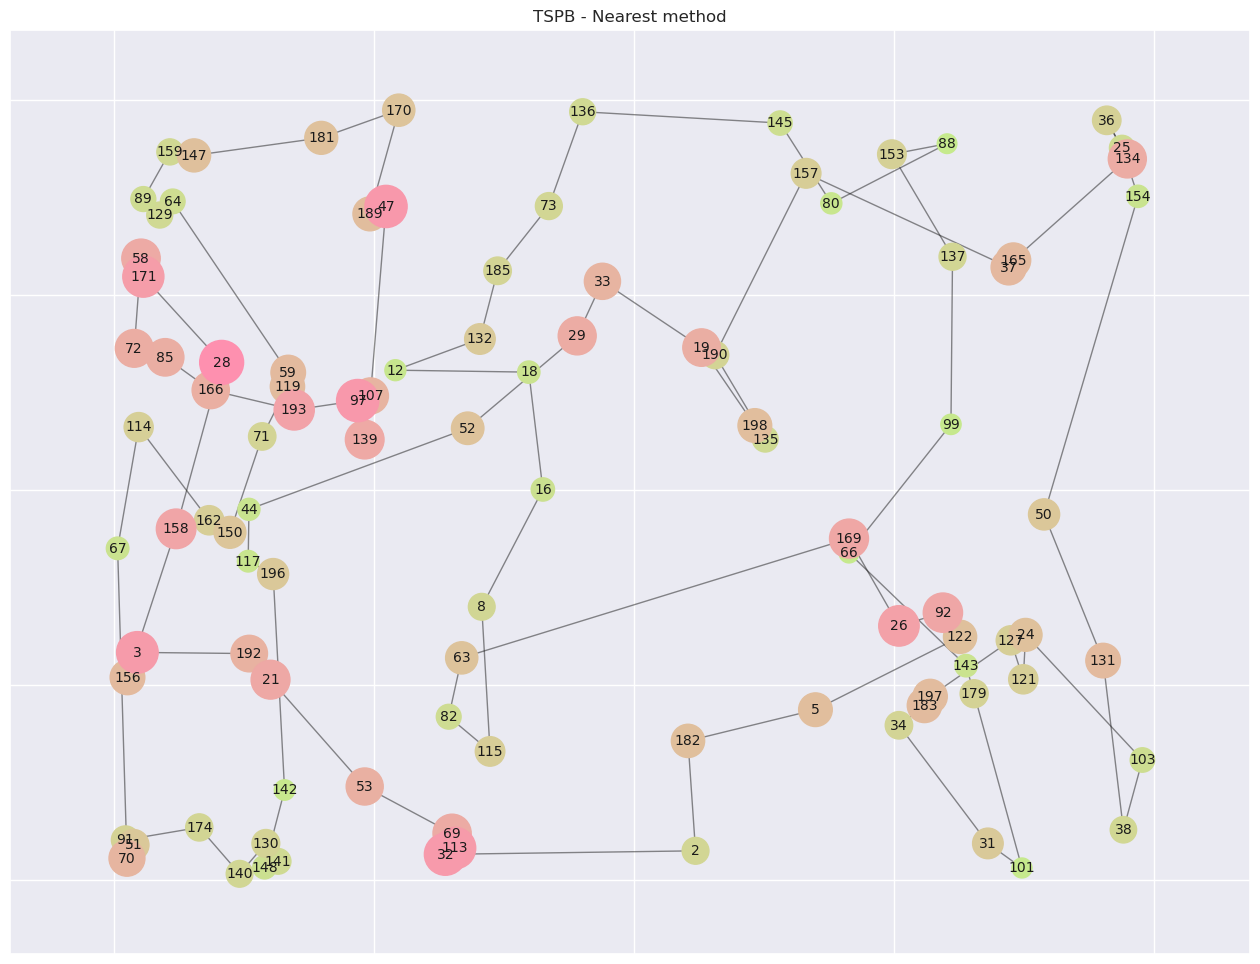

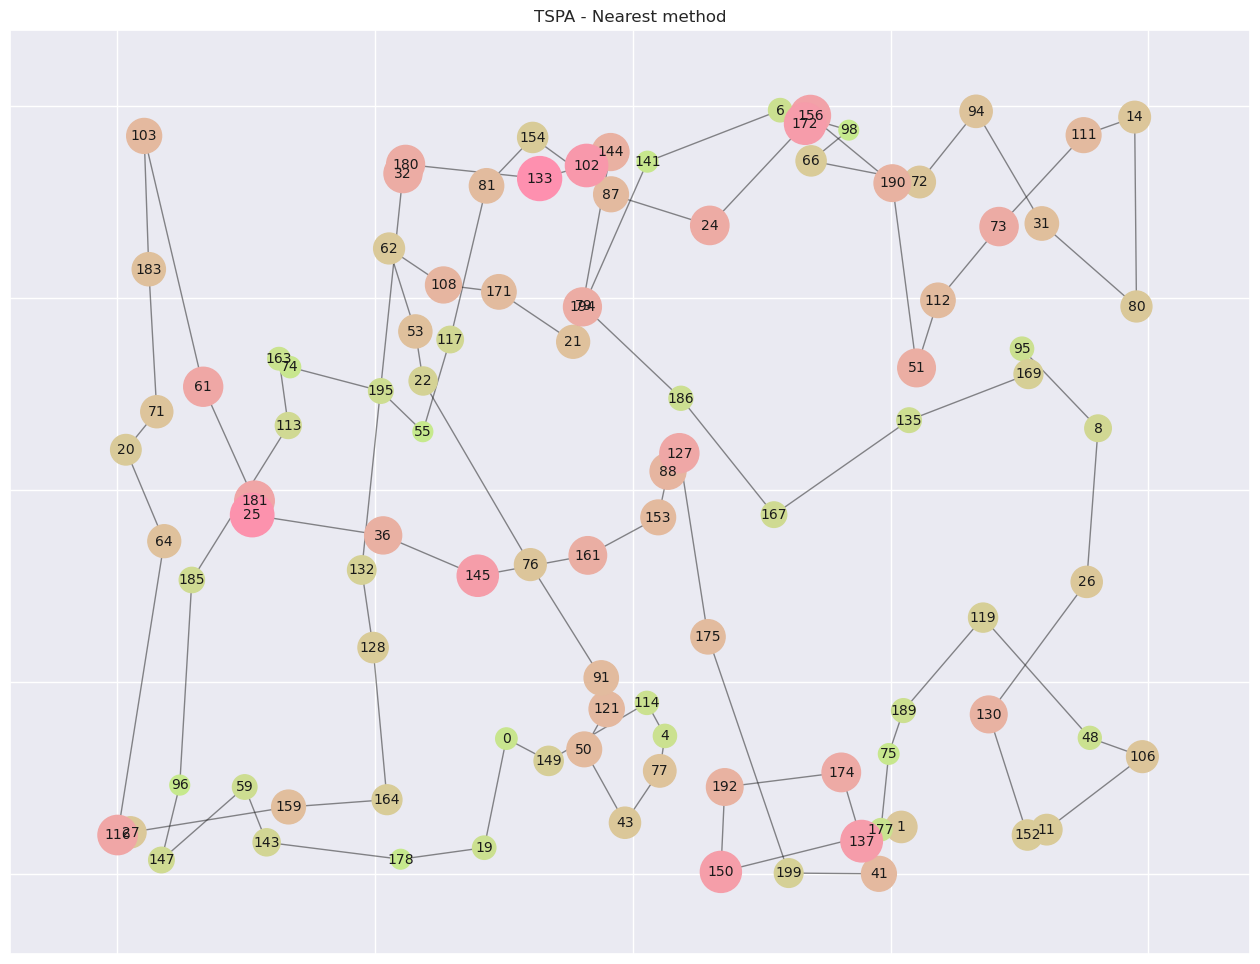

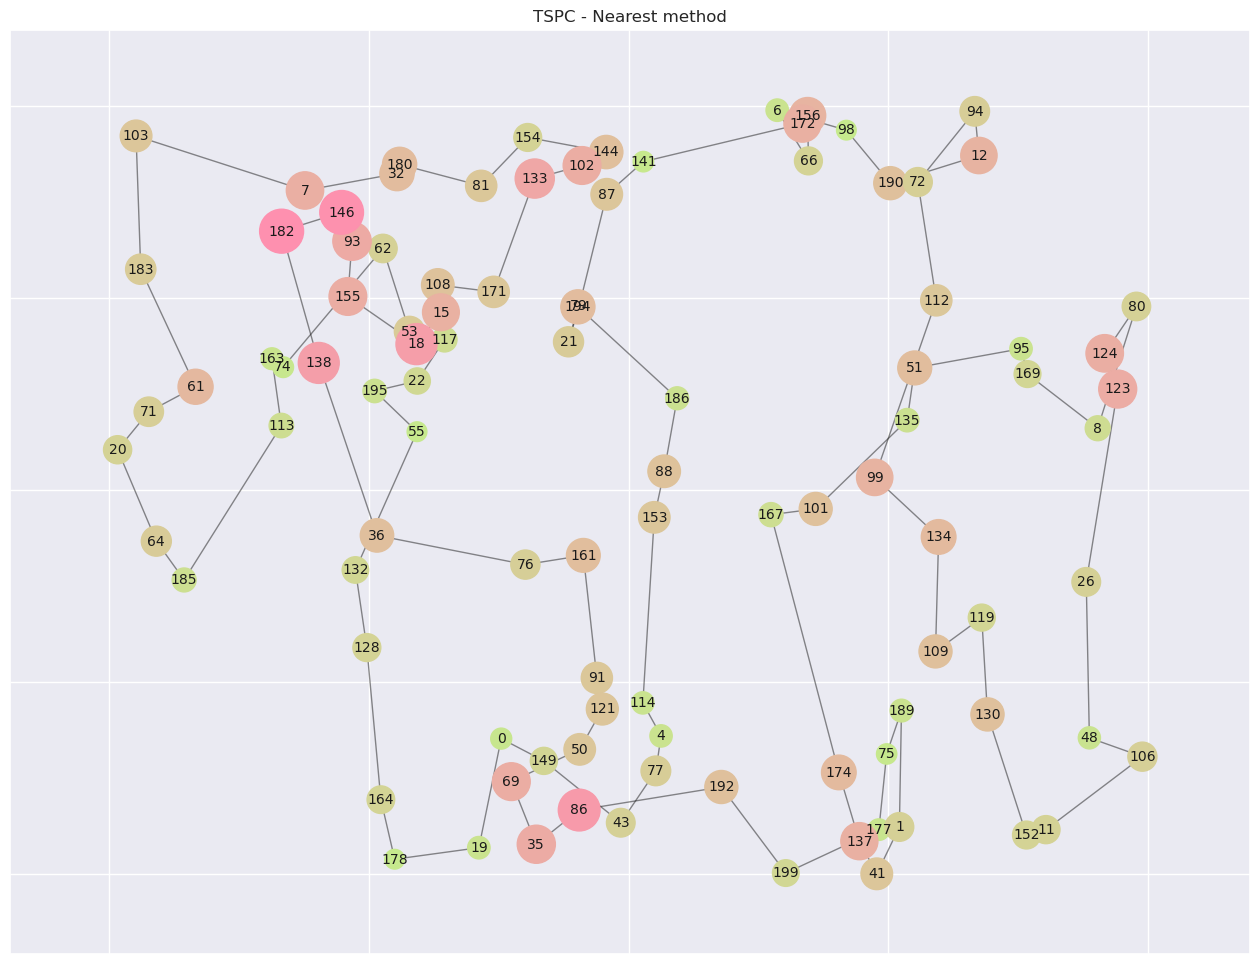

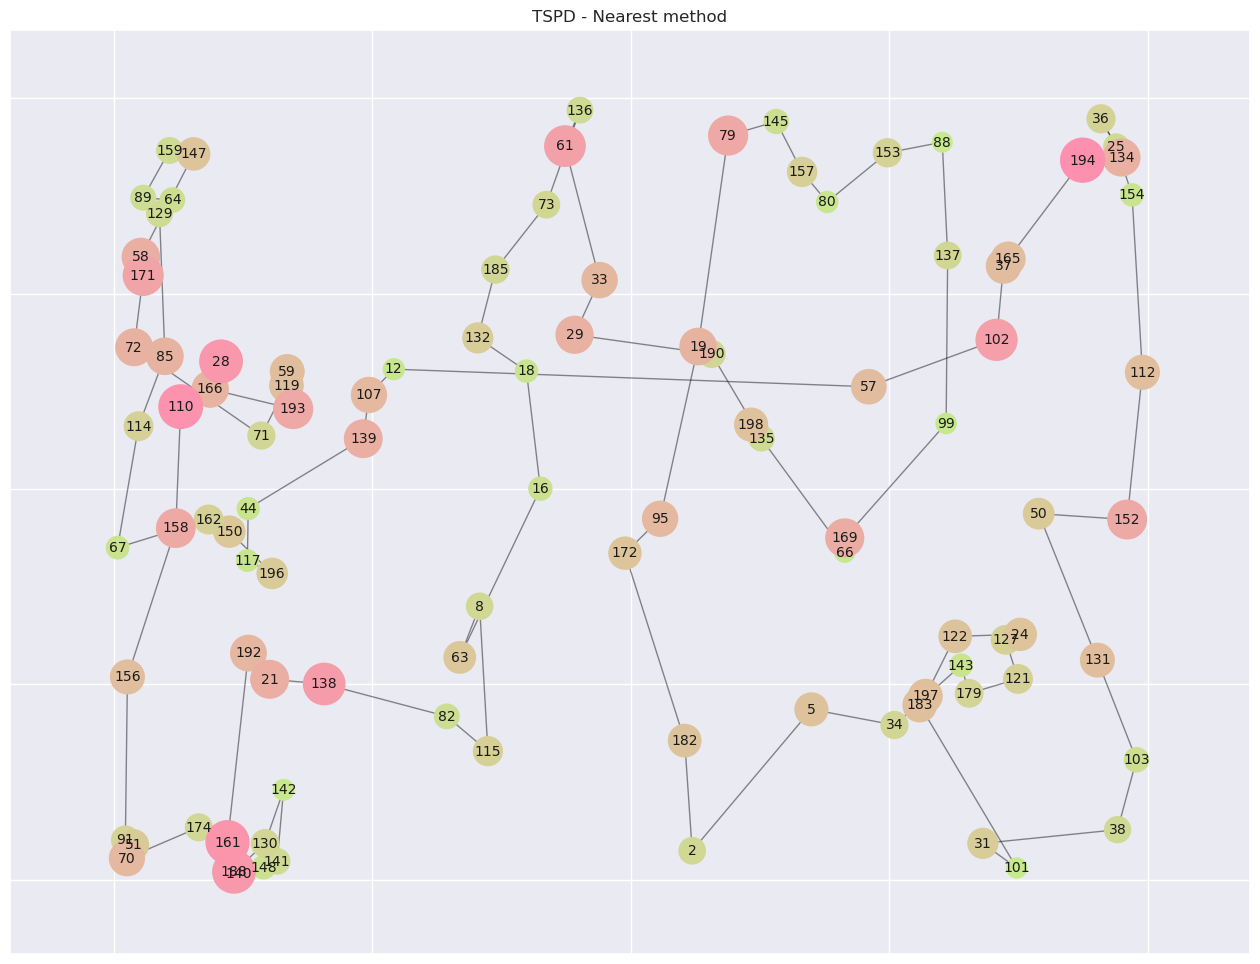

In [22]:
for instance_name, instance_grades in grades.items():
    for method_name, grade in instance_grades.items():
        visualizer.visualise_solution(grade, instance_name, method_name)